# Code to pre process images of droplets

In [86]:
'''
pip install openvc-python
pip install cvlib
pip install tensorflow
'''

import numpy as np
import cv2
import matplotlib.pyplot as plt
import cvlib as cv
import pandas as pd
from cvlib.object_detection import draw_bbox
from ipywidgets import *

Image to load:

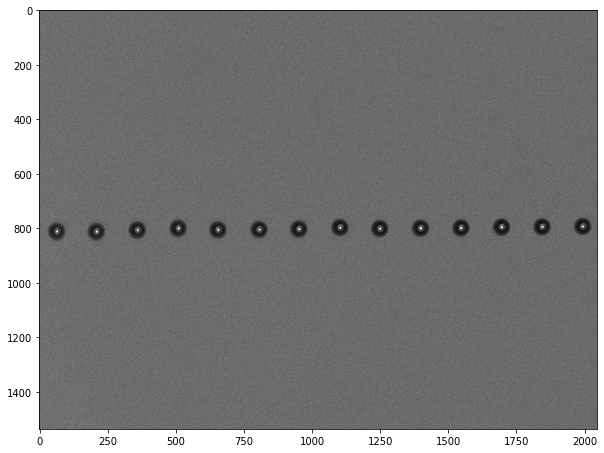

In [87]:
directory = 'Test_Images/'
filename='1.5mm_53.6ul_254.5kHz'
img = cv2.imread(directory + filename + '.png')
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

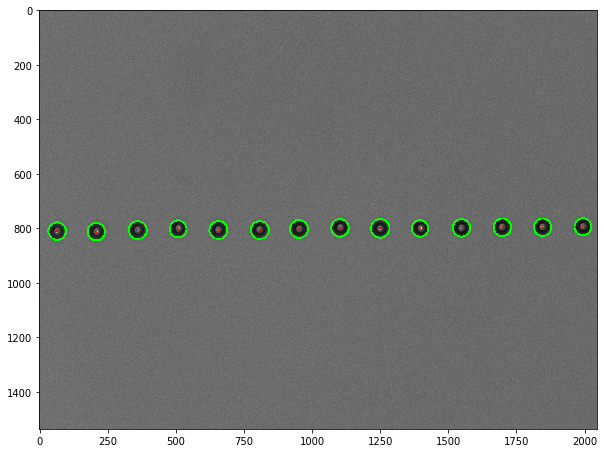

In [88]:
in_img = cv2.imread(directory + '1.5mm_53.6ul_254.5kHz.png', 0)
circles = cv2.HoughCircles(in_img, cv2.HOUGH_GRADIENT, 1,
                           120, param1=80, param2=20, minRadius=5, maxRadius=50)
circles = np.uint16(np.around(circles))

output = img.copy()
for i in circles[0, :]:
    #	draw	the	outer	circle
    cv2.circle(output, (i[0], i[1]), i[2], (0, 255, 0), 6)
    #	draw	the	center	of	the	circle
    cv2.circle(output, (i[0], i[1]), 2, (0, 0, 255), 3)

plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))

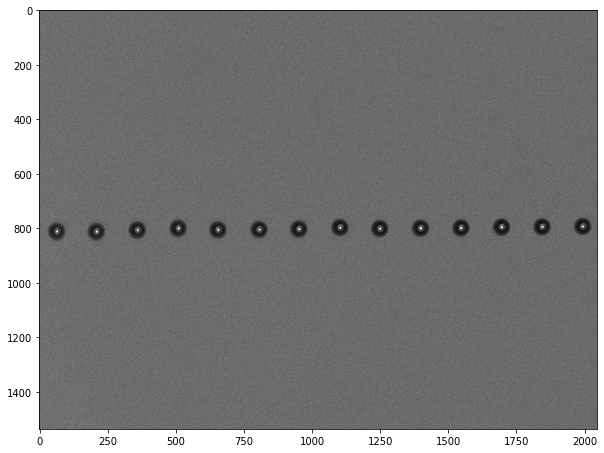

In [89]:
plt.figure(figsize=(10, 10))
plt.imshow(img)

In [90]:
def param_test(param1=80, param2=20, minRadius=5, maxRadius=50):
    circles = cv2.HoughCircles(in_img, cv2.HOUGH_GRADIENT, 1, 120, param1=param1,
                               param2=param2, minRadius=minRadius, maxRadius=maxRadius)
    circles = np.uint16(np.around(circles))

    output = img.copy()
    for i in circles[0, :]:
        #	draw	the	outer	circle
        cv2.circle(output, (i[0], i[1]), i[2], (0, 255, 0), 6)
        #	draw	the	center	of	the	circle
        cv2.circle(output, (i[0], i[1]), 2, (0, 0, 255), 3)

    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))


interactive_plot = interactive(param_test, param1=(0, 100), param2=(
    0, 100), minRadius=(0, 100), maxRadius=(0, 100))
interactive_plot

interactive(children=(IntSlider(value=80, description='param1'), IntSlider(value=20, description='param2'), In…

[[[ 658  806   33]
  [ 362  806   33]
  [1252  800   34]
  [1848  796   32]
  [ 810  806   33]
  [1398  800   30]
  [  66  810   32]
  [ 210  812   32]
  [1550  798   32]
  [ 954  802   33]
  [1700  796   32]
  [1996  794   31]
  [ 510  802   31]
  [1104  798   32]]]
[806 806 800 796 806 800 810 812 798 802 796 794 802 798]


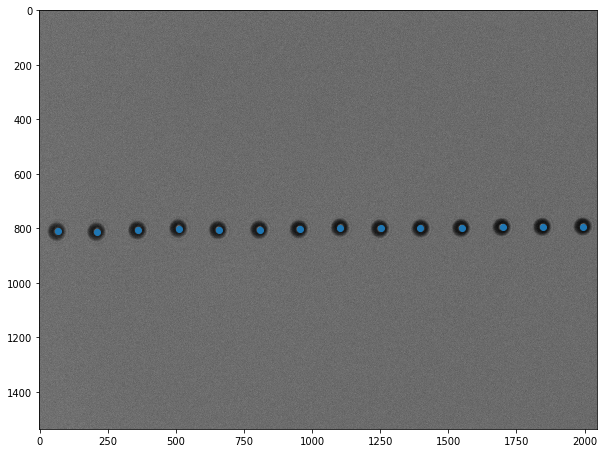

In [91]:
print(circles)
print(circles[0, :, 1])
x = circles[0, :, 0]
y = circles[0, :, 1]
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.scatter(x, y)

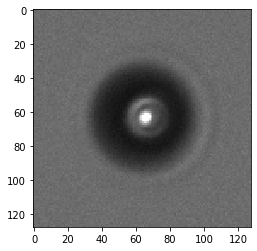

In [92]:
x_positions=circles[0, :, 0]
y_positions=circles[0, :, 1]
radii=circles[0, :, 2]

cut_from=img.copy()

for circle_index,value in enumerate(x_positions):
    x_pos=x_positions[circle_index]
    y_pos=y_positions[circle_index]
    radius=radii[circle_index]
    if circle_index>-1:
        #image_i=cut_from[x_pos:radius,y_pos:radius]
        image_i=cut_from[y_pos-radius*2:y_pos+radius*2,x_pos-radius*2:x_pos+radius*2]
        plt.imshow(image_i)
        plt.savefig('{0}{1}_x_{2}y_{3}r_{4}_cut{5}.png'.format(directory,filename,x_pos,y_pos,radius,circle_index))
    else:
        break
plt.imshow(image_i)